# Определение языка и VK API

В данном задании вам нужно будет:

* используя API Вконтакте, скачать комментарии к первым ста постам из пяти сообществ
* натренировать модель распознавания языков на статьях из Википедии.
* распознать язык всех комментариев, где в тексте есть 10 и более символов, и построить статистику

## VK API

Для подключения к ВКонтакте мы будем использовать VK API. Здесь есть документация к этой библиотеке https://vk-api.readthedocs.io/en/latest/

In [ ]:
#!pip(3) install vk_api

In [1]:
import vk_api

# здесь нужно ввести данные своего аккаунта
# когда будете сдавать, не забудьте убрать эти две строчки из ноутбука
user = '' # вставьте сюда свой номер телефона
password = '' # вставьте сюда свой пароль

# авторизация
vk_session = vk_api.VkApi(login=user, password=password)
vk_session.auth()

vk = vk_session.get_api() # объект с API

Получить записи со страницы можно с помощью метода `wall.get`. Он принимает параметр `domain` — короткое имя пользователя или сообщества — и `count` — количество записей, которое вы хотите получить (максимум — 100). По Список методов для работы со стенами: https://vk.com/dev/wall

Например, вот так можно получить последние две записи с вот этой страницы https://vk.com/futureisnow. Выдача представляет собой словарь, в котором в поле `items` записан список словарей, содержащий информацию о каждой из записи. 

In [2]:
vk.wall.get(domain="futureisnow", count=2)

{'count': 8202,
 'items': [{'id': 250631,
   'from_id': -111587102,
   'owner_id': -111587102,
   'date': 1569768300,
   'marked_as_ads': 0,
   'post_type': 'post',
   'text': '',
   'signer_id': 30399743,
   'attachments': [{'type': 'photo',
     'photo': {'id': 457288592,
      'album_id': -7,
      'owner_id': -111587102,
      'user_id': 100,
      'sizes': [{'type': 'm',
        'url': 'https://sun1-94.userapi.com/c851424/v851424255/1c89d2/GBIpQNznCJ4.jpg',
        'width': 92,
        'height': 130},
       {'type': 'o',
        'url': 'https://sun1-89.userapi.com/c851424/v851424255/1c89d6/Vnon07fZ4js.jpg',
        'width': 130,
        'height': 184},
       {'type': 'p',
        'url': 'https://sun1-28.userapi.com/c851424/v851424255/1c89d7/AEnw_e4uNVU.jpg',
        'width': 200,
        'height': 283},
       {'type': 'q',
        'url': 'https://sun1-26.userapi.com/c851424/v851424255/1c89d8/JmBEfHlL-jc.jpg',
        'width': 320,
        'height': 453},
       {'type': 'r',
  

С помощью метода `groups.getById` можно получить информацию о сообществе, в том числе его id.

In [3]:
vk.groups.getById(group_ids="futureisnow")

[{'id': 111587102,
  'name': 'киберпанк, который мы заслужили',
  'screen_name': 'futureisnow',
  'is_closed': 0,
  'type': 'page',
  'is_admin': 0,
  'is_member': 0,
  'is_advertiser': 0,
  'photo_50': 'https://sun1-29.userapi.com/c845124/v845124938/4b879/-EzOFg-vjTg.jpg?ava=1',
  'photo_100': 'https://sun1-14.userapi.com/c845124/v845124938/4b878/Lr9NW4jLxOU.jpg?ava=1',
  'photo_200': 'https://sun1-85.userapi.com/c845124/v845124938/4b877/dqfgJ42Ir5E.jpg?ava=1'}]

Скачайте информацию о последних ста записях в следующих пабликах: https://vk.com/futureisnow, https://vk.com/eternalclassic, https://vk.com/ukrlit_memes, https://vk.com/ukrainer_net, https://vk.com/amanzohel, https://vk.com/barg_kurumk_culture

In [4]:
# список domain'ов, чтобы вам не копировать их самими :)
publics = ["futureisnow",
           "eternalclassic",
           "ukrlit_memes",
           "ukrainer_net",
           "amanzohel",
           "barg_kurumk_culture"]

In [5]:
items = {} # ключи — это паблики
posts = [] # все скачанные посты

for i in publics:
    name = str(i)
    data = vk.wall.get(domain=name, count=100)
    data = data['items']
    posts += data
    items[name] = data
    
#print(items)

Найдите в документации (https://vk.com/dev/wall) метод для получения комментариев и получите первые сто комментариев каждого поста из выборки для каждого паблика.

In [6]:
corpora = {}

futureisnow = []  # все комментарии к 100 постам паблика futureisnow
eternalclassic = []  # все комментарии к 100 постам паблика eternalclassic
ukrlit_memes = []  # все комментарии к 100 постам паблика ukrlit_memes
ukrainer_net = []  # все комментарии к 100 постам паблика ukrainer_net
amanzohel = []  # все комментарии к 100 постам паблика amanzohel
barg_kurumk_culture = []  # все комментарии к 100 постам паблика barg_kurumk_culture

for post in posts:
    post_id = post['id']
    owner_id = post['owner_id']
    comments = vk.wall.getComments(owner_id=owner_id, 
                                   post_id=post_id, count=100)
    comments = comments['items']
    for comment in comments:
        if 'deleted' in comment:
                continue
        if len(comment['text']) > 10:
            text = comment['text']
        if owner_id == -111587102:
            futureisnow.append(text) 
        if owner_id == -129440544:
            eternalclassic.append(text) 
        if owner_id == -131348832:
            ukrlit_memes.append(text)
        if owner_id == -5164516:
            ukrainer_net.append(text)
        if owner_id == -66347916:
            amanzohel.append(text)
        if owner_id == -95189895:
            barg_kurumk_culture.append(text)
        
com = []
com.append(futureisnow)
com.append(eternalclassic)
com.append(ukrlit_memes)
com.append(ukrainer_net)
com.append(amanzohel)
com.append(barg_kurumk_culture)

corpora = dict(zip(publics, com))

#print(corpora)    

**Задание со звездочкой:** вы могли заметить, что если обращаться к каждому посту отдельно, то все занимает довольно продолжительное время (около пяти минут). Найдите в документации vk_api способ сделать это быстрее.

In [7]:
#corpora = {}


## Тренировка моделей

В наших комментариях встречались русский, украинский, английский и бурятский.

In [8]:
langs = {'ru', 'uk', 'en', 'bxr'}

In [9]:
from collections import Counter

import nltk
import wikipedia

In [48]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vital\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

Скачайте документы, на которых вы будете обучать свои модели. Для наших целей хорошо иметь для каждого языка корпус размером около 50 статей.

In [10]:
# найдите нужный код, не вставляйте лишний (!)
def get_texts_for_lang(lang, n=10):
    wiki_content = []
    wikipedia.set_lang(lang)
    pages = wikipedia.random(n)
    for page_name in pages:
        try:
            page = wikipedia.page(page_name)
            wiki_content.append("%s\n%s" % (page.title, page.content.replace('=', '')))
        except wikipedia.exceptions.WikipediaException:
            print("Skip %s" % page_name)
    return wiki_content

In [11]:
wiki_texts = {}
for lang in langs:
    wiki_texts[lang] = get_texts_for_lang(lang, 50)
    print(lang, len(wiki_texts[lang]))

c:\users\vital\appdata\local\programs\python\python37-32\lib\site-packages\wikipedia\wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html.parser"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file c:\users\vital\appdata\local\programs\python\python37-32\lib\site-packages\wikipedia\wikipedia.py. To get rid of this warning, pass the additional argument 'features="html.parser"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Skip Тэнгэри (тодоруулга)
bxr 49
Skip Mount Despair
Skip Dakshini
en 48
Skip Симфонія № 8
Skip Блендер (значення)
Skip Тени (значення)
uk 47
Skip Шапиро, Владимир
Skip Битва при Ноле
Skip Капорали
Skip Сквайр (значения)
Skip Алабота
Skip Колос (платформа)
Skip Аддоницио
ru 43


Сделайте определялку на частотах слов.

In [12]:
# найдите нужный код, не вставляйте лишний (!)

def collect_freqlist(wiki_pages, max_len=100):
    freqlist = Counter()
    # не забудем про токенизацию - nltk.word_tokenize
    for text in wiki_pages:
        for word in nltk.word_tokenize(text.lower()):
            if word.isalpha():
                freqlist[word] += 1
    return dict(freqlist.most_common(max_len))

In [13]:
freq_lists = {}
for lang in langs:
    freq_lists[lang] = collect_freqlist(wiki_texts[lang])

In [14]:
def simple_lang_detect(freq_lists, text):
    counts = Counter()
    for lang, freq_list in freq_lists.items():
        freq_list = Counter(freq_list)
        for word in nltk.word_tokenize(text):
            counts[lang] += int(freq_list[word] > 0)
    return counts.most_common()

Сделайте определялку на символьных энграммах.

In [15]:
# найдите нужный код, не вставляйте лишний (!)

from sklearn import feature_extraction

vectorizer = feature_extraction.text.TfidfVectorizer(ngram_range=(1, 5), analyzer='char')
vectorizer.fit(wiki_texts['ru'])
for item in vectorizer.get_feature_names()[:100]:
    print(item)




1

13

13 

13 а

19

195

1955

1956

1957

1958

196

1965

1969

197

1971

1975

1976

1977

1978

198

1980

1981

1982

1983

1984

1985

1986

1987

1988

1989

199

1990

1991

1992

1993

1994

1995

1996

1997

1998

1999

2

2 

2 г

2 го

2 к

2 кл

2 т

2 тр

2 ф

2 фа

2 фл

20

200

2000

2001

2002

2003

2004

2005

2006

2007

2008

201

2010

2011

2012

2013

2014

2016

21

21 

21 н

27

27 

27 с

3

3 

3 т

3 тр

30

30 

30 с

4

4 

4 в

4 ва

4 н

4 но

5

5 

5 д

5 де

a

a 

a m

a me

ad

ada


In [16]:
from sklearn import pipeline
from sklearn import naive_bayes
import numpy as np

%pylab inline
import matplotlib.pyplot as plt
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


c:\users\vital\appdata\local\programs\python\python37-32\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['text']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [17]:
clf = pipeline.Pipeline([
    ('vctr', feature_extraction.text.TfidfVectorizer(ngram_range=(1, 2), analyzer='char')),
    ('clf', naive_bayes.MultinomialNB())
])

In [18]:
all_texts = []
lang_indices = []
for lang in wiki_texts:
    all_texts.extend(wiki_texts[lang])
    lang_indices.extend([lang]*len(wiki_texts[lang]))

In [19]:
# Обучаем классификатор
clf.fit(np.array(all_texts), np.array(lang_indices))

Pipeline(memory=None,
         steps=[('vctr',
                 TfidfVectorizer(analyzer='char', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

# Определение языка

Определите язык каждого комментария в каждом паблике с помощью определялки на частотах слов и покажите доли языков среди комментариев для каждого паблика.

In [20]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

Доли языков среди комментариев для паблика futureisnow
{'NA': 594, 'ru': 559, 'en': 17, 'uk': 298, 'bxr': 82}


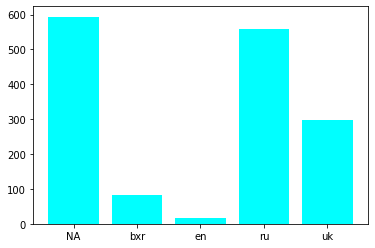

Доли языков среди комментариев для паблика eternalclassic
{'NA': 585, 'ru': 0, 'en': 839, 'uk': 0, 'bxr': 36}


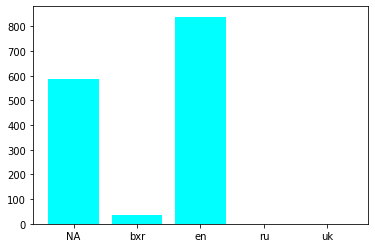

Доли языков среди комментариев для паблика ukrlit_memes
{'NA': 134, 'ru': 36, 'en': 4, 'uk': 153, 'bxr': 7}


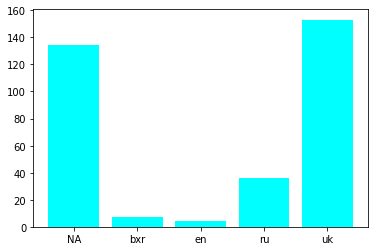

Доли языков среди комментариев для паблика ukrainer_net
{'NA': 99, 'ru': 15, 'en': 0, 'uk': 122, 'bxr': 6}


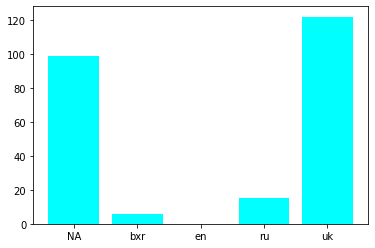

Доли языков среди комментариев для паблика amanzohel
{'NA': 396, 'ru': 14, 'en': 0, 'uk': 16, 'bxr': 20}


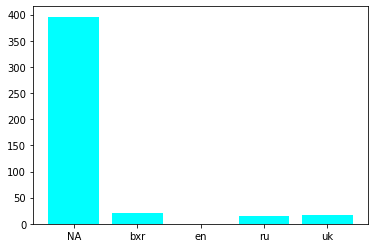

Доли языков среди комментариев для паблика barg_kurumk_culture
{'NA': 136, 'ru': 74, 'en': 0, 'uk': 34, 'bxr': 37}


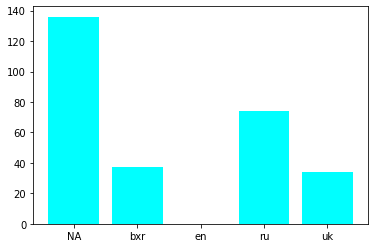

In [21]:
lang_detects_freqs = {}

for key, value in corpora.items():
    public = key
    ru = 0
    en = 0
    bxr = 0
    uk = 0
    NA = 0 
    for i in value:
       # print(i)
        text = str(i)
        lang_detects_freqs = dict(simple_lang_detect(freq_lists, text))
       # print(lang_detects_freqs)
        top = {c: lang_detects_freqs[c] for c in 
               lang_detects_freqs if lang_detects_freqs[c] > 0 and len(c) > 0}
        top = (sorted(top.items(), key=lambda x: x[1], reverse=True))[:1]
        top = dict(top)
        if len(top) == 0:
            NA += 1
        for key in top.keys():
            if key == 'ru':
                ru +=1
            if key == 'en':
                en +=1
            if key == 'uk':
                uk +=1
            if key == 'bxr':
                bxr +=1
    
    languages = ['NA', 'ru', 'en', 'uk', 'bxr']
    nums = [NA, ru, en, uk, bxr]
    lang_detects_freqs = dict(zip(languages, nums))
    print('Доли языков среди комментариев для паблика', public)
    print(lang_detects_freqs)
    Y = [c[1] for c in sorted(
        lang_detects_freqs.items(), key=lambda x: x[0], reverse=False
        )
        ]
    X = sorted([l for l in lang_detects_freqs])
    plt.bar(X, Y, color='aqua')
    plt.show()

Сделайте то же самое для определителя на символьных энграммах.

Доли языков среди комментариев для паблика futureisnow
{'bxr': 46, 'en': 62, 'ru': 1248, 'uk': 194}


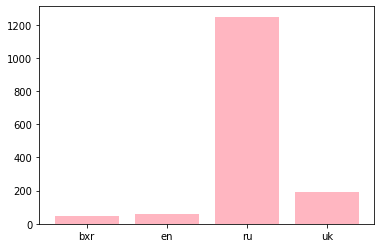

Доли языков среди комментариев для паблика eternalclassic
{'bxr': 0, 'en': 1456, 'ru': 0, 'uk': 4}


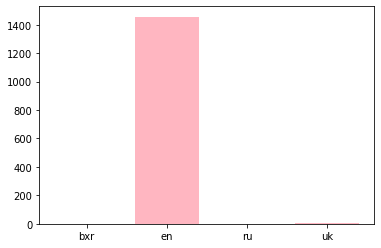

Доли языков среди комментариев для паблика ukrlit_memes
{'bxr': 10, 'en': 8, 'ru': 86, 'uk': 230}


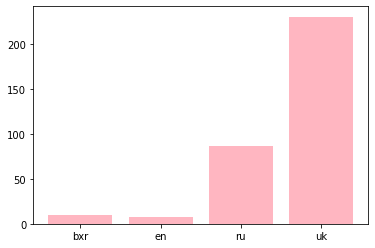

Доли языков среди комментариев для паблика ukrainer_net
{'bxr': 15, 'en': 7, 'ru': 43, 'uk': 177}


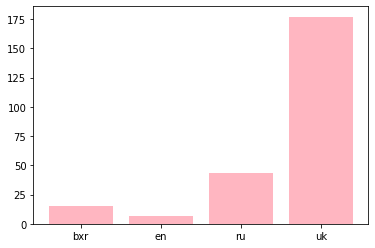

Доли языков среди комментариев для паблика amanzohel
{'bxr': 390, 'en': 0, 'ru': 48, 'uk': 8}


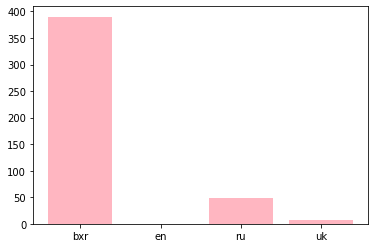

Доли языков среди комментариев для паблика barg_kurumk_culture
{'bxr': 108, 'en': 1, 'ru': 147, 'uk': 25}


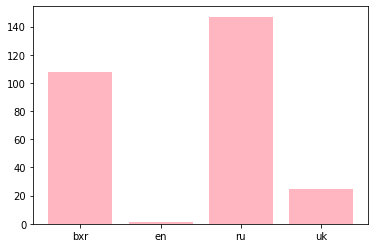

In [22]:
lang_detects_ngrams = {}

for key, value in corpora.items():
    public = key
    texts = value
    results = clf.predict(texts)
    ru = 0
    en = 0
    uk = 0
    bxr = 0
    for i in results:
        if i == 'ru':
            ru += 1
        if i == 'en':
            en += 1
        if i == 'uk':
            uk  += 1
        if i == 'bxr':
            bxr += 1
            
    lang_detects_ngrams['bxr'] = bxr
    lang_detects_ngrams['en'] = en
    lang_detects_ngrams['ru'] = ru
    lang_detects_ngrams['uk'] = uk
     
    print('Доли языков среди комментариев для паблика', key)
    print(lang_detects_ngrams)
    Y = [c[1] for c in sorted(
        lang_detects_ngrams.items(), key=lambda x: x[0], reverse=False
        )
        ]
    X = sorted([l for l in lang_detects_ngrams])
    plt.bar(X, Y, color='lightpink')
    plt.show()

Обсудите работу каждого из классификаторов, обсудите ошибки, объясните разницу в результатах.

Классификатор на частотах слов часто не определяет язык комменатрия (при условии, что его длина больше 10 символов), для каждого паблика доля NA составляет большой процент от общего числа, но можно попробовать определить самый популярный язык комменатриев:

для futureisnow -- русский;

для eternalclassic -- английсикй;

для ukrlit_memes -- русский и украинский;

для ukrainer_net -- украинский;

для amanzohel -- русский;

для barg_kurumk_culture -- русский.

Ошибки для последних двух пабликов - определен русский язык, вместо предполагаемого бурятского. Вероятно, классификатор не смог распознать комменатрии на бурятском, и в данном распределении они относятся к группе NA.

Классификатор на н-граммах показывает более приближенный к реальности результат по определению самого популярного языка комментариев:

для futureisnow -- русский;

для eternalclassic -- английсикй;

для ukrlit_memes -- украинский;

для ukrainer_net -- украинский;

для amanzohel -- бурятский;

для barg_kurumk_culture -- русский (бурятский на втором месте).

Разница в результатах может объясняться тем, что определение языка по последовательности символов является более чувствительным  методом для разных типов текстов. Использования частотного словаря иногда бывает недостаточно, например, как показывают результаты, даже в длинном коммментарии необязательно есть топ-слова языка (может состоять из имени собственного + не частотной экспрессивно-оценочной лексики).